# Boston Housing | Exploratory Data Analysis

### Questions To Solve:

What is the distribution of values for each feature in the dataset?

Are there any missing values in the dataset, and if so, how are they distributed across the features?

Are there any outliers or extreme values in the dataset, and how do they affect our understanding of the data?

What is the correlation between each feature and the target variable (MEDV), and which features are most strongly correlated?

Are there any significant differences in the distribution of features between neighborhoods in Boston?

How do different combinations of features affect the distribution of MEDV values in the dataset?

Are there any patterns or trends in the relationship between features and MEDV that can be observed through visualizations?

Are there any interactions or nonlinear relationships between features that affect the target variable?

How do different statistical transformations of the features (such as logarithmic or polynomial transformations) affect the relationship with MEDV?

How well can different regression models predict the target variable based on the available features, and what are the most important predictors for these models?

-----------------------------------------------------------------------
What is the distribution of MEDV values in the dataset?

Which features are most strongly correlated with MEDV?

Is there a relationship between the proportion of non-retail business acres per town (INDUS) and housing prices (MEDV)?

How does the crime rate (CRIM) affect housing prices (MEDV)?

Is there a significant difference in housing prices (MEDV) between neighborhoods with different levels of air pollution (NOX)?

How do the distances to employment centers (DIS) and radial highways (RAD) affect housing prices (MEDV)?

Is there a relationship between the percentage of lower status of the population (LSTAT) and housing prices (MEDV)?

How does the pupil-teacher ratio (PTRATIO) affect housing prices (MEDV)?

Are there any significant differences in housing prices (MEDV) between neighborhoods that border the Charles River (CHAS) and those that do not?

Can we build an accurate regression model to predict housing prices (MEDV) based on the other input features in the dataset?

----------------------------------------------------

https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

1https://archive.ics.uci.edu/ml/datasets/Housing

123

20.2. Load the Dataset 124

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. 

B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

We can see that the input attributes have a mixture of units.

-------------------------------------------------------------

### EDA 

In [2]:
link = 'https://raw.githubusercontent.com/vishalv91/capstoneproject-realestate/master/HousingData.csv'


In [3]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/vishalv91/capstoneproject-realestate/master/HousingData.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
df.dropna(inplace=True) # dropping the null rows...

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [12]:
df[df.duplicated()] # it indicates duplicate values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [13]:
df['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [14]:
# Not Necessary But might be helpful for other data sets

def find_unique_values(df):
    unique_values = {}
    for col in df.columns:
        unique = df[col].unique()
        unique_values[col] = unique
    return unique_values
find_unique_values(df)

{'CRIM': array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 2.98500e-02,
        1.44550e-01, 2.11240e-01, 2.24890e-01, 1.17470e-01, 9.37800e-02,
        6.29760e-01, 6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01,
        7.25800e-01, 1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01,
        7.50260e-01, 8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01,
        1.00245e+00, 1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00,
        1.61282e+00, 8.01400e-02, 1.75050e-01, 2.76300e-02, 3.35900e-02,
        1.27440e-01, 1.41500e-01, 1.22690e-01, 1.71420e-01, 1.88360e-01,
        2.53870e-01, 2.19770e-01, 8.87300e-02, 5.36000e-02, 1.36000e-02,
        1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
        1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
        3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.28160e-01,
        8.82600e-02, 1.58760e-01, 9.16400e-02, 9.51200e-02, 1.01530e-01,
        8.70700e-02, 5.64600e-02, 4.11300e-

### Que


What is the relationship between the crime rate and the median value of homes in a neighborhood?

How does the distance to employment centers affect the value of homes in an area?

Is there a relationship between the number of rooms in a house and its value?

What is the effect of air pollution on the value of homes in a neighborhood?

Is there a correlation between the percentage of lower status population in a neighborhood and the value of homes in that area?


#### What is the relationship between the crime rate and the median value of homes in a neighborhood?

<Axes: >

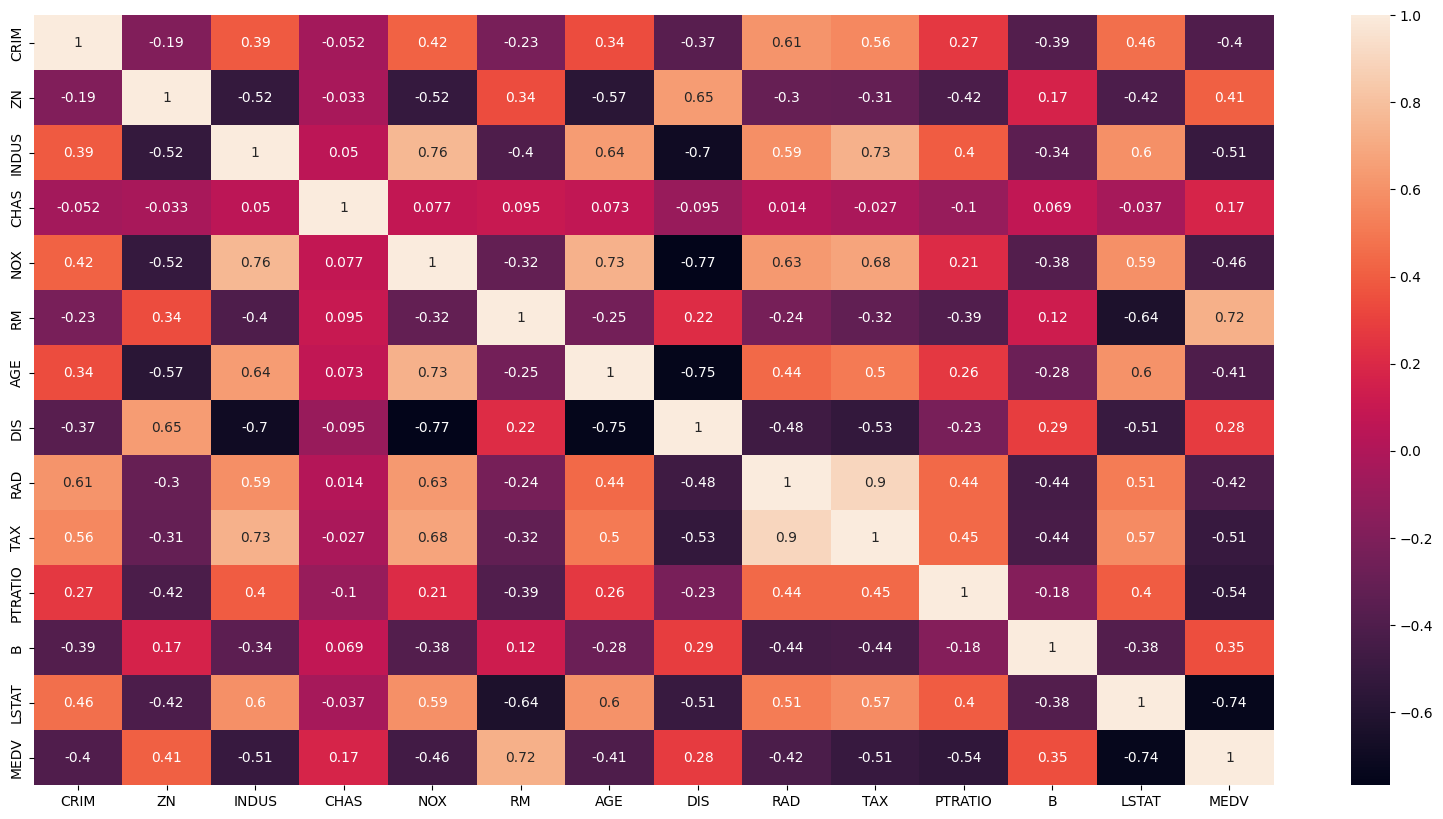

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
corr_matrix =df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix,annot=True)

<Axes: title={'center': 'CRIM vs MEDV'}, xlabel='CRIM', ylabel='MEDV'>

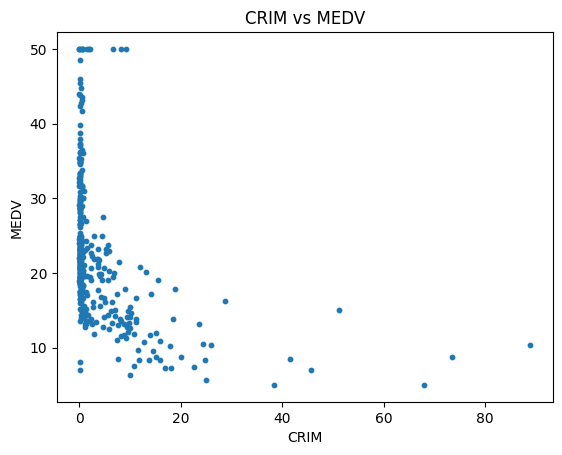

In [19]:
df.plot.scatter(x = "CRIM", y = 'MEDV', title='CRIM vs MEDV', s = 10)

<Axes: xlabel='DIS', ylabel='MEDV'>

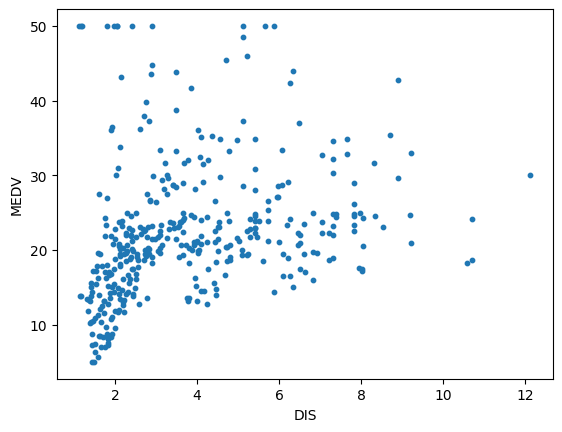

In [20]:
df.plot.scatter(x = "DIS", y = 'MEDV', s = 10)

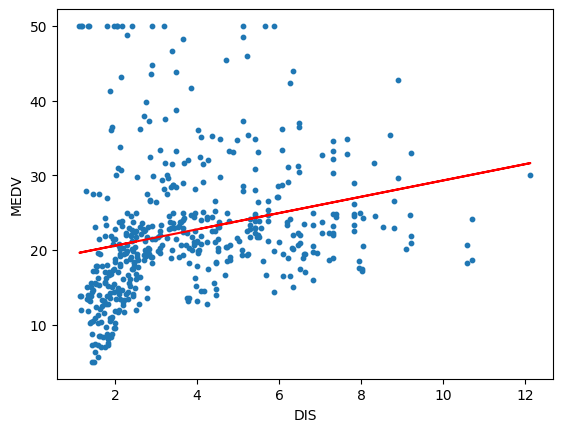

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Boston Housing Dataset
df = pd.read_csv(link)

# Plot a scatter plot of DIS vs. MEDV
df.plot.scatter(x='DIS', y='MEDV', s=10)

# Calculate the line of best fit using polyfit
x = df['DIS']
y = df['MEDV']
m, b = np.polyfit(x, y, 1)

# Add the line of best fit to the scatter plot
plt.plot(x, m*x + b, color='red')

# Show the plot
plt.show()


<Axes: ylabel='Density'>

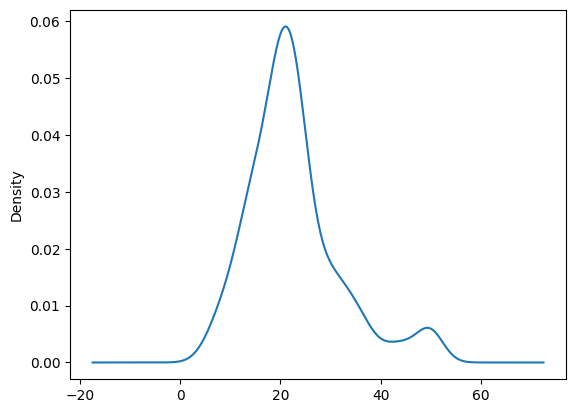

In [25]:
df['MEDV'].plot(kind='kde')